# Import some basic libraries 

In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [2]:
data = pd.read_excel("Churn_modelling.xlsx")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.drop(columns=["RowNumber", "Surname"],inplace=True)
data.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
for col in data.columns:
    print("col_name: ", col, "unique percentage: ", len(data[col].unique())/len(data))

col_name:  CustomerId unique percentage:  1.0
col_name:  CreditScore unique percentage:  0.046
col_name:  Geography unique percentage:  0.0003
col_name:  Gender unique percentage:  0.0002
col_name:  Age unique percentage:  0.007
col_name:  Tenure unique percentage:  0.0011
col_name:  Balance unique percentage:  0.6382
col_name:  NumOfProducts unique percentage:  0.0004
col_name:  HasCrCard unique percentage:  0.0002
col_name:  IsActiveMember unique percentage:  0.0002
col_name:  EstimatedSalary unique percentage:  0.9999
col_name:  Exited unique percentage:  0.0002


# Check missing values in a dataset

In [6]:
data.isnull().sum() 

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Here is the no missing values in the dataset

# Label Encoder 

In [7]:
from sklearn.preprocessing import LabelEncoder
d_types = dict(data.dtypes)
for name, type_ in d_types.items():
    if str(type_) == 'object':
        enco = LabelEncoder()
        data[name] = enco.fit_transform(data[name])

In [8]:
data.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# Feature and target column


In [9]:
x = data.iloc[:,:-1]
x.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10


In [10]:
y = data["Exited"]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 101)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

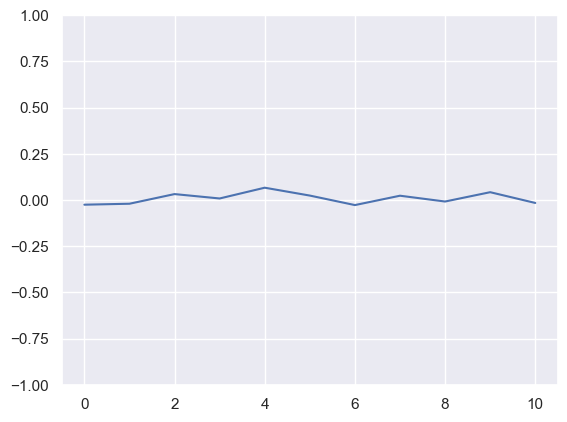

In [13]:
plt.ylim(-1,1)

means = []
for i in range(x_test.shape[1]):
    means.append(np.mean(x_test[:,i]))
plt.plot(means, scaley = False)

# Bulid Logistic Regression 

In [14]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)

LogisticRegression()

In [15]:
y_pred_train = logit_model.predict(x_train)
y_pred_test = logit_model.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [17]:
def model_report(model):
    model_name_pred_train = model.predict(x_train)
    model_name_pred_test = model.predict(x_test)
    print("Confusion Matric: ", confusion_matrix(y_train, model_name_pred_train ) )
    print("======="*9)
    print("Confusion Matric: ", confusion_matrix(y_test, model_name_pred_test ) )
    print("======="*9)
    print("Accuracy score: ", accuracy_score(y_train, model_name_pred_train ) )
    print("======="*9)
    print("Accuracy score: ", accuracy_score(y_test, model_name_pred_test ) )
    print("======="*9)
    print("classification_report: ", classification_report(y_train, model_name_pred_train ) )
    print("======="*9)
    print("classification_report: ", classification_report(y_test, model_name_pred_test ) )

In [18]:
model_report(logit_model)

Confusion Matric:  [[6209  177]
 [1344  270]]
Confusion Matric:  [[1533   44]
 [ 353   70]]
Accuracy score:  0.809875
Accuracy score:  0.8015
classification_report:                precision    recall  f1-score   support

           0       0.82      0.97      0.89      6386
           1       0.60      0.17      0.26      1614

    accuracy                           0.81      8000
   macro avg       0.71      0.57      0.58      8000
weighted avg       0.78      0.81      0.76      8000

classification_report:                precision    recall  f1-score   support

           0       0.81      0.97      0.89      1577
           1       0.61      0.17      0.26       423

    accuracy                           0.80      2000
   macro avg       0.71      0.57      0.57      2000
weighted avg       0.77      0.80      0.75      2000



# Plot Confusion Matrix Plot

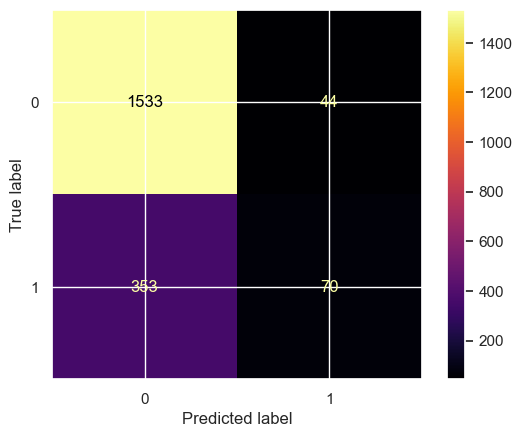

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_diplay = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test ))
cm_diplay.plot(cmap = plt.cm.inferno)
plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV

model = LogisticRegression()
rfecv = RFECV(model , step = 1, min_features_to_select = 4 , n_jobs = -1)
rfecv.fit(x_train , y_train)

RFECV(estimator=LogisticRegression(), min_features_to_select=4, n_jobs=-1)

# Analysis 

# 1.
Achieving an 80% accuracy in a churn modeling dataset using logistic regression is a good starting point:

# 2. Churn Modeling Analysis
Dataset Overview:
The churn modeling dataset consists of information about customers and their churn status. The goal is to predict whether a customer will churn based on various features.

# 3. Model Performance:
The logistic regression model achieved an accuracy of 80% on the dataset. This means that the model correctly predicts churn status for 80% of the customers in the dataset.

# 4. Key Findings:

. Feature Importance: Analyzing the coefficients of the logistic regression model provides insights into the importance of different features in predicting churn. Features with higher absolute coefficients have a stronger influence on the prediction.

. Interpretation of Coefficients: Positive coefficients indicate that an increase in the corresponding feature value increases the likelihood of churn, while negative coefficients indicate the opposite. Interpretation of coefficients can provide actionable insights for reducing churn.

# 5. Model Evaluation Metrics:

Precision: The precision of the model indicates the proportion of true positive predictions among all positive predictions. It is essential for understanding the accuracy of churn predictions and minimizing false positives.

Recall: Recall measures the proportion of actual positives that were correctly identified by the model. It helps to capture the model's ability to identify all instances of churn.

F1-score: The F1-score is the harmonic mean of precision and recall and provides a balanced measure of model performance.

Confusion Matrix: Analyzing the confusion matrix helps to understand the types of errors made by the model (e.g., false positives, false negatives) and provides insights for model improvement.

# 6. Next Steps:

Feature Engineering: Explore additional features or transformations of existing features to improve model performance.

 # 7. Conclusion:
The logistic regression model provides a solid baseline for churn prediction, achieving an accuracy of 80%. Further analysis and optimization techniques can enhance the model's performance and provide actionable insights for reducing churn and improving customer retention strategies.